# Data Manipulation: Forming a Weekly Time Series

In [35]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [3]:
hotel_bookings = pd.read_csv('../data/H1.csv')

In [4]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
IsCanceled                     40060 non-null int64
LeadTime                       40060 non-null int64
ArrivalDateYear                40060 non-null int64
ArrivalDateMonth               40060 non-null object
ArrivalDateWeekNumber          40060 non-null int64
ArrivalDateDayOfMonth          40060 non-null int64
StaysInWeekendNights           40060 non-null int64
StaysInWeekNights              40060 non-null int64
Adults                         40060 non-null int64
Children                       40060 non-null int64
Babies                         40060 non-null int64
Meal                           40060 non-null object
Country                        39596 non-null object
MarketSegment                  40060 non-null object
DistributionChannel            40060 non-null object
IsRepeatedGuest                40060 non-null int64
PreviousCancellations          40060 non-null int64
Pr

In [5]:
hotel_bookings['Date(Year and Week Number)'] = hotel_bookings['ArrivalDateYear'].map(str) +  + hotel_bookings['ArrivalDateWeekNumber'].map(str)

In [6]:
hotel_bookings_year_week = hotel_bookings.copy()[['Date(Year and Week Number)', 'IsCanceled']]

In [7]:
weekly_cancelled_bookings = hotel_bookings_year_week.groupby('Date(Year and Week Number)').sum()

In [8]:
weekly_cancelled_bookings

,IsCanceled
Date(Year and Week Number),
201527,41
201528,48
201529,87
201530,74
201531,101
201532,68
201533,96
201534,69
201535,88


# Time Series Components

Decompose the time series and plot the trend, residual and seasonal components.

In [46]:
decomposition=seasonal_decompose(weekly_cancelled_bookings, period=52)
residual=decomposition.resid
trend=decomposition.trend
seasonal=decomposition.seasonal

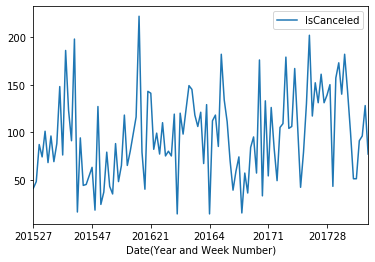

In [9]:
weekly_cancelled_bookings.plot()

In [10]:
pyplot.show()

Generate separate plots for the values of acf and pacf using statsmodels.

In [38]:
acf(weekly_cancelled_bookings, nlags=4)

C:\Users\oagbaneje\AppData\Local\Continuum\anaconda3\envs\env-network\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


array([1.        , 0.1591609 , 0.27683086, 0.20977546, 0.03483783])

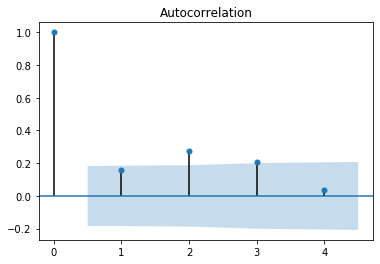

In [36]:
plot_acf(weekly_cancelled_bookings, lags=4)
pyplot.show()

In [39]:
pacf(weekly_cancelled_bookings, nlags=4)

array([ 1.        ,  0.16055705,  0.26272462,  0.15420727, -0.08392886])

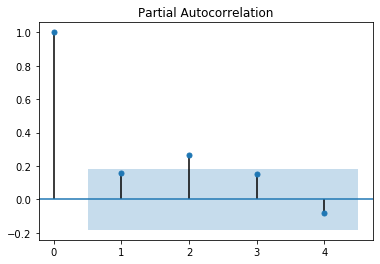

In [37]:
plot_pacf(weekly_cancelled_bookings, lags=4)
pyplot.show()

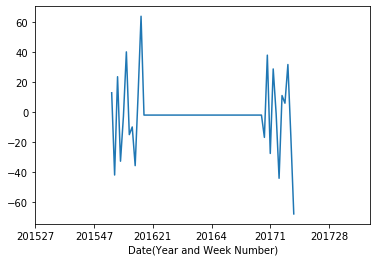

In [31]:
residual.plot()

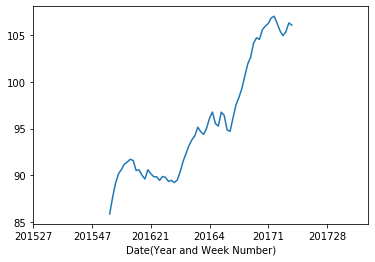

In [30]:
trend.plot()

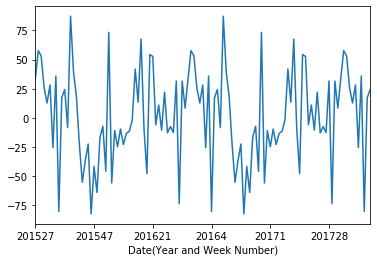

In [32]:
seasonal.plot()

Use pandas to calculate a 4-period SMA and plot this against the actual time series.

In [42]:
weekly_cancelled_ma = weekly_cancelled_bookings.rolling(window=4).mean()

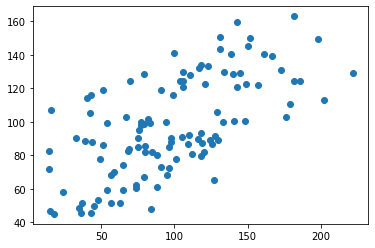

In [45]:
pyplot.scatter(weekly_cancelled_bookings, weekly_cancelled_ma, )

Split the time series into training and test partitions. Allocate 90% of the data to the training set and 10% to the test set.

In [52]:
training = weekly_cancelled_bookings.iloc[:round(len(weekly_cancelled_bookings)*0.9)]

In [53]:
testing = weekly_cancelled_bookings.iloc[round(len(weekly_cancelled_bookings)*0.9):]